In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("troop_movements.csv")
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-07-11 11:49:05,1,resistance_soldier,empire,5,5,10,1,Alderaan
1,2024-07-11 11:49:04,2,at-st,resistance,7,6,4,8,Corellia
2,2024-07-11 11:49:03,3,at-at,resistance,4,4,6,3,Eriadu
3,2024-07-11 11:49:02,4,at-at,empire,10,1,8,7,Skako
4,2024-07-11 11:49:01,5,unknown,resistance,4,8,10,3,Iridonia


In [6]:
empire_resistance_count = df['empire_or_resistance'].value_counts()
print(empire_resistance_count)

empire_or_resistance
empire        507
resistance    493
Name: count, dtype: int64


In [7]:
count_homeworld = df['homeworld'].value_counts()
print(count_homeworld)

homeworld
Naboo           33
Aleen Minor     32
Tholoth         31
Chandrila       31
Skako           30
Dorin           30
Troiken         30
Umbara          30
Eriadu          29
Ryloth          28
Vulpter         28
Dagobah         27
Kashyyyk        27
Dathomir        26
Muunilinst      25
Kalee           25
Shili           25
Champala        25
Quermia         25
Alderaan        24
Rodia           23
Toydaria        23
Haruun Kal      23
Iktotch         23
Ojom            23
Mon Cala        23
Tund            23
Zolan           22
Malastare       21
Mirial          21
Iridonia        21
Concord Dawn    20
Tatooine        19
Glee Anselm     19
Stewjon         19
Socorro         18
Bestine IV      17
Corellia        17
Sullust         17
Cerea           17
Serenno         16
Trandosha       14
Name: count, dtype: int64


In [8]:
count_unit_type = df['unit_type'].value_counts()
print(count_unit_type)

unit_type
tie_fighter           134
at-st                 131
unknown               131
stormtrooper          127
x-wing                122
resistance_soldier    120
tie_silencer          120
at-at                 115
Name: count, dtype: int64


In [13]:
df['is_resistance'] = True
df.loc[df['empire_or_resistance'] == 'empire', 'is_resistance'] = False
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-07-11 11:49:05,1,resistance_soldier,empire,5,5,10,1,Alderaan,False
1,2024-07-11 11:49:04,2,at-st,resistance,7,6,4,8,Corellia,True
2,2024-07-11 11:49:03,3,at-at,resistance,4,4,6,3,Eriadu,True
3,2024-07-11 11:49:02,4,at-at,empire,10,1,8,7,Skako,False
4,2024-07-11 11:49:01,5,unknown,resistance,4,8,10,3,Iridonia,True


Index(['empire', 'resistance'], dtype='object', name='empire_or_resistance')


<Axes: xlabel='empire_or_resistance', ylabel='count'>

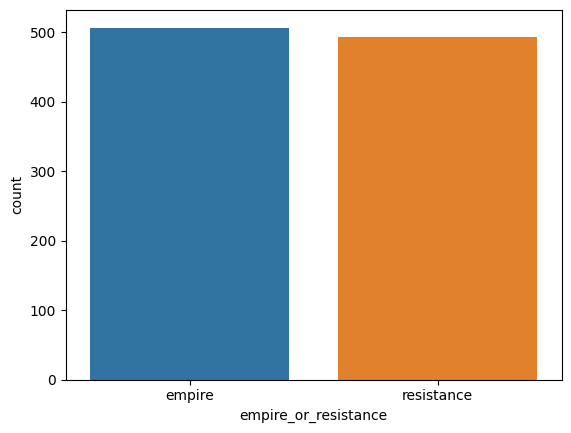

In [25]:
print(empire_resistance_count.index)
sns.barplot(x=empire_resistance_count.index, y=empire_resistance_count, hue=empire_resistance_count.index)

## Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['homeworld', 'unit_type']] # feature set (what the model trains)
y = df[['empire_or_resistance']] # what we want to predict
X = pd.get_dummies(X)
y = pd.get_dummies(y)
print(y)

     empire_or_resistance_empire  empire_or_resistance_resistance
0                           True                            False
1                          False                             True
2                          False                             True
3                           True                            False
4                          False                             True
..                           ...                              ...
995                        False                             True
996                         True                            False
997                        False                             True
998                        False                             True
999                         True                            False

[1000 rows x 2 columns]


In [58]:
model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.32


In [49]:
importance = model.feature_importances_
#display(importance)

feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
display(feature_importances)

,Feature,Importance
0,homeworld_Alderaan,0.010278
1,homeworld_Aleen Minor,0.020732
2,homeworld_Bestine IV,0.016337
3,homeworld_Cerea,0.010019
4,homeworld_Champala,0.010547
5,homeworld_Chandrila,0.017048
6,homeworld_Concord Dawn,0.003252
7,homeworld_Corellia,0.004535
8,homeworld_Dagobah,0.004721
9,homeworld_Dathomir,0.018996


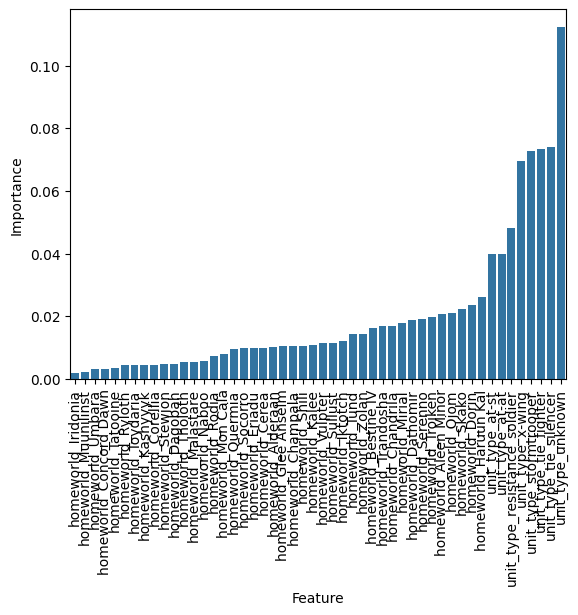

In [57]:
sns.barplot(data=feature_importances, x="Feature", y="Importance", order=feature_importances.sort_values("Importance").Feature)
plt.xticks(rotation=90)
plt.show()

In [60]:
import pickle

filename = "trained_model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(model, file)